In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [4]:
d = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-4/datasets/diamonds/diamonds.csv')

In [5]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
X = d[['carat','depth','table','x','y','z']]
y = d.price.values

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
rf = RandomForestRegressor(n_estimators=100, max_depth=None, verbose=1)

In [11]:
rf.fit(X, y)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=1, warm_start=False)

In [16]:
mean_obs = pd.DataFrame(X.mean(axis=0)).T
mean_obs

,carat,depth,table,x,y,z
0,0.79794,61.749405,57.457184,5.731157,5.734526,3.538734


In [17]:
d.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [24]:
carat_vals = np.linspace(.2, 5., 100.)
depth_vals = np.linspace(43., 79., 100.)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


In [22]:
carat_vals.shape, depth_vals.shape

((100,), (100,))

In [25]:
predX = mean_obs.sample(n=10000, replace=True)

In [26]:
predX.head()

,carat,depth,table,x,y,z
0,0.79794,61.749405,57.457184,5.731157,5.734526,3.538734
0,0.79794,61.749405,57.457184,5.731157,5.734526,3.538734
0,0.79794,61.749405,57.457184,5.731157,5.734526,3.538734
0,0.79794,61.749405,57.457184,5.731157,5.734526,3.538734
0,0.79794,61.749405,57.457184,5.731157,5.734526,3.538734


In [27]:
for i, cv in enumerate(carat_vals):
    for j, dv in enumerate(depth_vals):
        rownum = (i*100) + j
        predX.iloc[rownum, [0,1]] = [cv, dv]

In [28]:
predX.head()

,carat,depth,table,x,y,z
0,0.2,43.000000,57.457184,5.731157,5.734526,3.538734
0,0.2,43.363636,57.457184,5.731157,5.734526,3.538734
0,0.2,43.727273,57.457184,5.731157,5.734526,3.538734
0,0.2,44.090909,57.457184,5.731157,5.734526,3.538734
0,0.2,44.454545,57.457184,5.731157,5.734526,3.538734


In [29]:
predictions = rf.predict(predX)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [30]:
predictions[0:50]

array([ 1806.39,  1806.39,  1806.39,  1806.39,  1806.39,  1806.39,
        1806.39,  1806.39,  1806.39,  1806.39,  1806.39,  1806.39,
        1806.39,  1806.39,  1806.39,  1806.39,  1806.39,  1806.39,
        1806.39,  1806.39,  1806.39,  1806.39,  1806.39,  1806.39,
        1806.39,  1806.39,  1806.39,  1806.39,  1806.39,  1806.39,
        1806.39,  1806.39,  1806.39,  1806.39,  1806.39,  1806.39,
        1804.55,  1793.84,  1815.84,  1838.06,  1863.47,  1861.99,
        1866.09,  1863.51,  1877.95,  1893.7 ,  1898.93,  1860.07,
        1905.22,  1925.43])

In [31]:
heat_matrix = predX[['carat','depth']]
heat_matrix['price_hat'] = predictions

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
heat_matrix.head()

,carat,depth,price_hat
0,0.2,43.000000,1806.39
0,0.2,43.363636,1806.39
0,0.2,43.727273,1806.39
0,0.2,44.090909,1806.39
0,0.2,44.454545,1806.39


In [33]:
import seaborn as sns

In [34]:
heat_mat = np.zeros((100, 100))
for i, cv in enumerate(carat_vals):
    for j, dv in enumerate(depth_vals):
        heat_mat[i, j] = heat_matrix.iloc[(i*100)+j, 2]

ERROR! Session/line number was not unique in database. History logging moved to new session 2441


In [35]:
heat_mat

array([[  1806.39      ,   1806.39      ,   1806.39      , ...,
          1871.41666667,   1871.41666667,   1871.41666667],
       [  1806.39      ,   1806.39      ,   1806.39      , ...,
          1871.41666667,   1871.41666667,   1871.41666667],
       [  1806.39      ,   1806.39      ,   1806.39      , ...,
          1871.41666667,   1871.41666667,   1871.41666667],
       ..., 
       [ 12393.38      ,  12393.38      ,  12393.38      , ...,
         10675.04      ,  10675.04      ,  10675.04      ],
       [ 12393.38      ,  12393.38      ,  12393.38      , ...,
         10675.04      ,  10675.04      ,  10675.04      ],
       [ 12393.38      ,  12393.38      ,  12393.38      , ...,
         10675.04      ,  10675.04      ,  10675.04      ]])

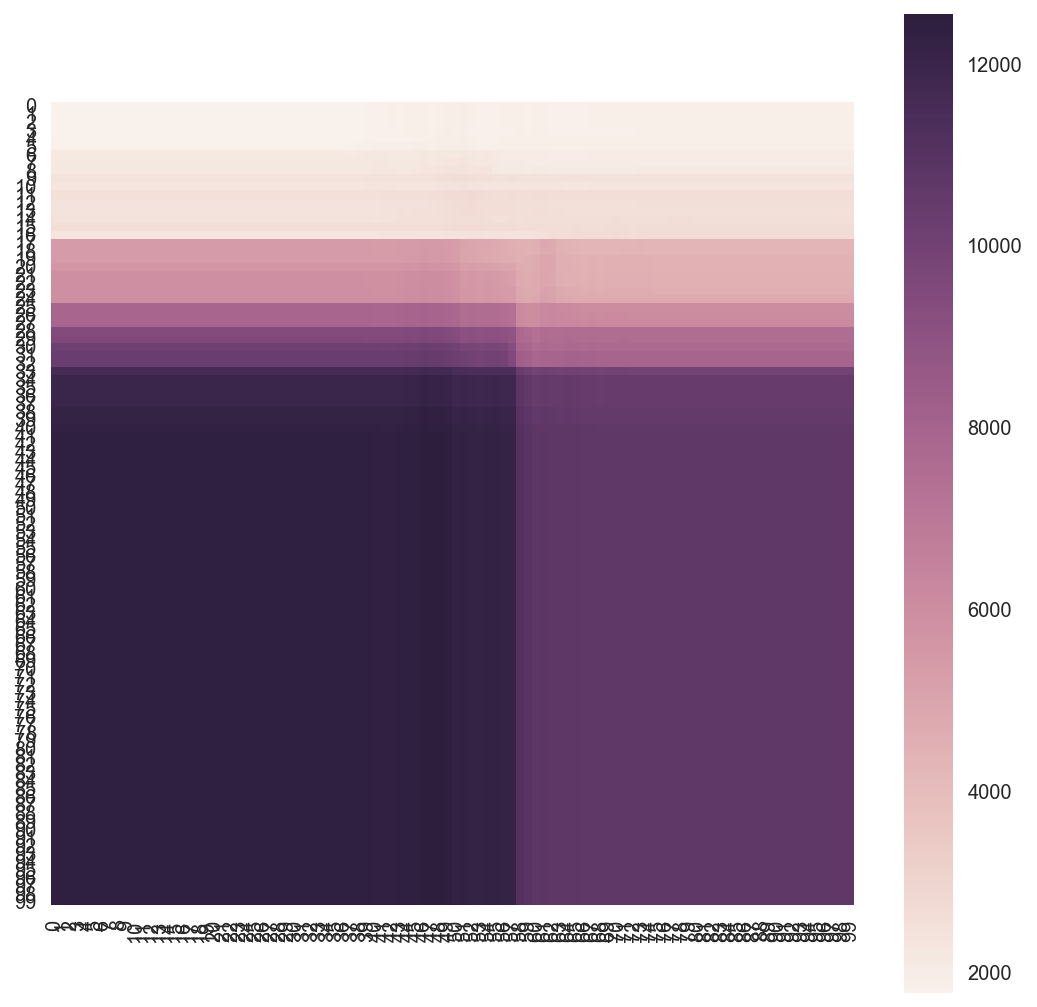

In [37]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(heat_mat, square=True, ax=ax)

In [38]:
predX = mean_obs.sample(n=100, replace=True)

In [39]:
for j, dv in enumerate(depth_vals):
    rownum = j
    predX.iloc[rownum, 1] = dv

In [40]:
preds = rf.predict(predX)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


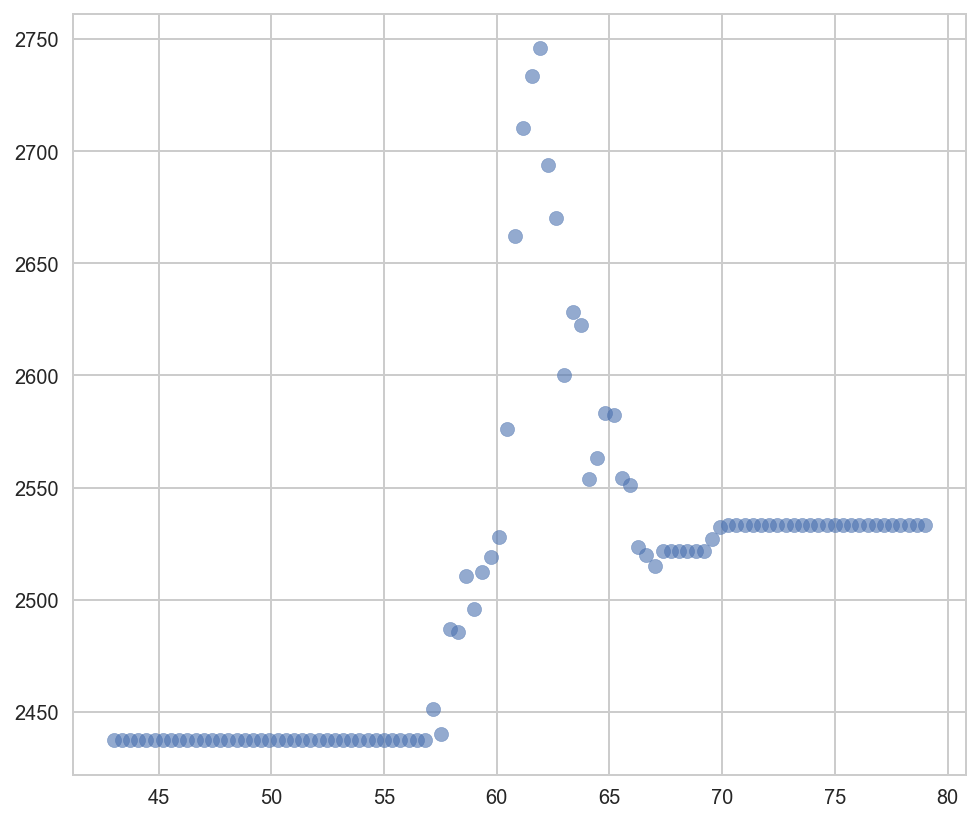

In [42]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(depth_vals, preds, s=50, alpha=0.6)
plt.show()